# Housing Prices Kaggle Competition

Hayley Caddes

## Exploratory Data Analysis:
* [Understand the Problem](#first-bullet)
* [Analyze Dependent Variable](#second-bullet)
* [Analyze Independent Variables](#third-bullet)
* [Missing Data](#fourth-bullet)
* [Feature Engineering](#fifth-bullet)
* [Machine Learning Models](#sixth-bullet)

## Understand the Problem <a class="anchor" id="first-bullet"></a>


#### Import packages

In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### Import datasets

In [372]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [373]:
pd.set_option('display.max_columns', 100)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [374]:
# checkout the columns
train_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Analyze Dependent Variable -- SalePrice<a class="anchor" id="second-bullet"></a>

Made an Excel spreadsheet "VariableAnalysis.csv" with my expectations regarding the importance of each variable as it relates to sale price.
* Generate some quick plots of the variables I thought had high importances and see if my predictions are on the right track

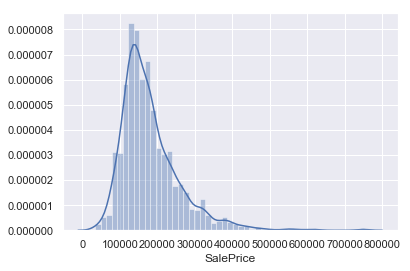

In [375]:
# let's look at the distribution of sale prices
sns.distplot(train_df.SalePrice)
# skewed right normal distribution

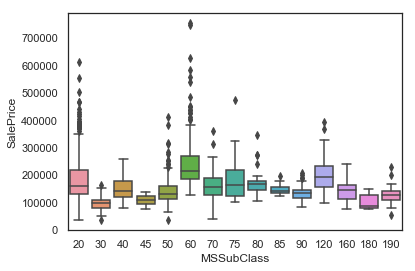

In [376]:
# MSSubClass
# Identifies type of dwelling involved in the sale
sns.set_style("white")
sns.boxplot(x=train_df.MSSubClass, y=train_df.SalePrice)
# medians don't seem that important to sale price, and the value from the type of home
# is probably captured better by another variable having to do with the building

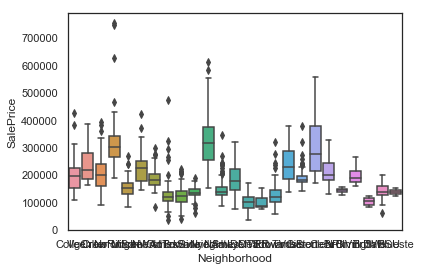

In [377]:
# Neighborhood
# Physical locations within Ames city limits
sns.boxplot(x=train_df.Neighborhood, y=train_df.SalePrice)
# Neighborhood has some significant correlation to sale price

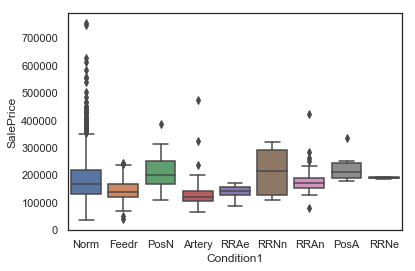

In [378]:
# Condition1
# Proximity to various neighborhood conditions
sns.boxplot(x=train_df.Condition1, y=train_df.SalePrice)
# The medians are all in about the same range

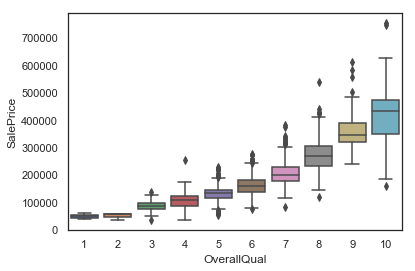

In [379]:
# OverallQual
# Rates the overall material and finish of the house
sns.boxplot(x=train_df.OverallQual, y=train_df.SalePrice)
# Definite correlation, looks linear

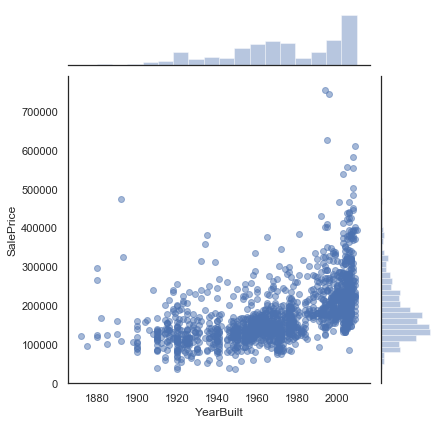

In [380]:
# YearBuilt
# Remodel date (same as construction date if no remodeling)
sns.jointplot("YearBuilt", "SalePrice", data = train_df, alpha = 0.5)
# Linear correlation

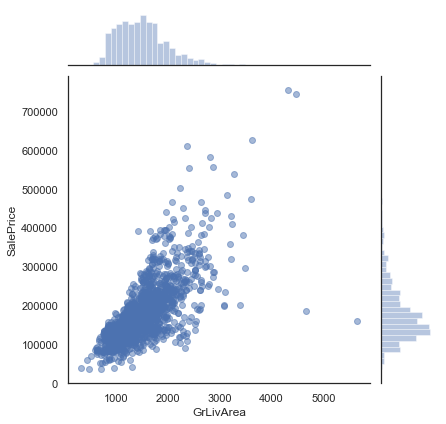

In [381]:
# GrLivArea
# Above grade (ground) living area square feet)
sns.jointplot("GrLivArea", "SalePrice", data = train_df, alpha = 0.5)
# Major linear correlation

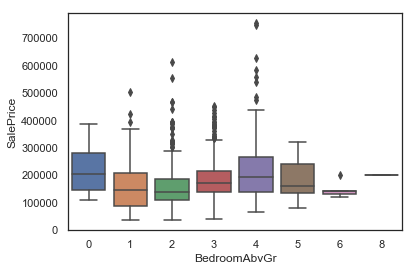

In [382]:
# Bedroom
# Bedrooms above grade (does not include basement bedrooms)
sns.boxplot("BedroomAbvGr", "SalePrice", data = train_df)
# some correlation, many outliers

In [383]:
#look at trend if add together bedrooms, baths
bedbaths = train_df[["FullBath", "HalfBath", "BedroomAbvGr", "BsmtFullBath", "BsmtHalfBath", "TotRmsAbvGrd", "SalePrice"]]
bedbaths["TotBath"] = bedbaths.FullBath + bedbaths.BsmtFullBath + bedbaths.HalfBath/2 + bedbaths.BsmtHalfBath/2

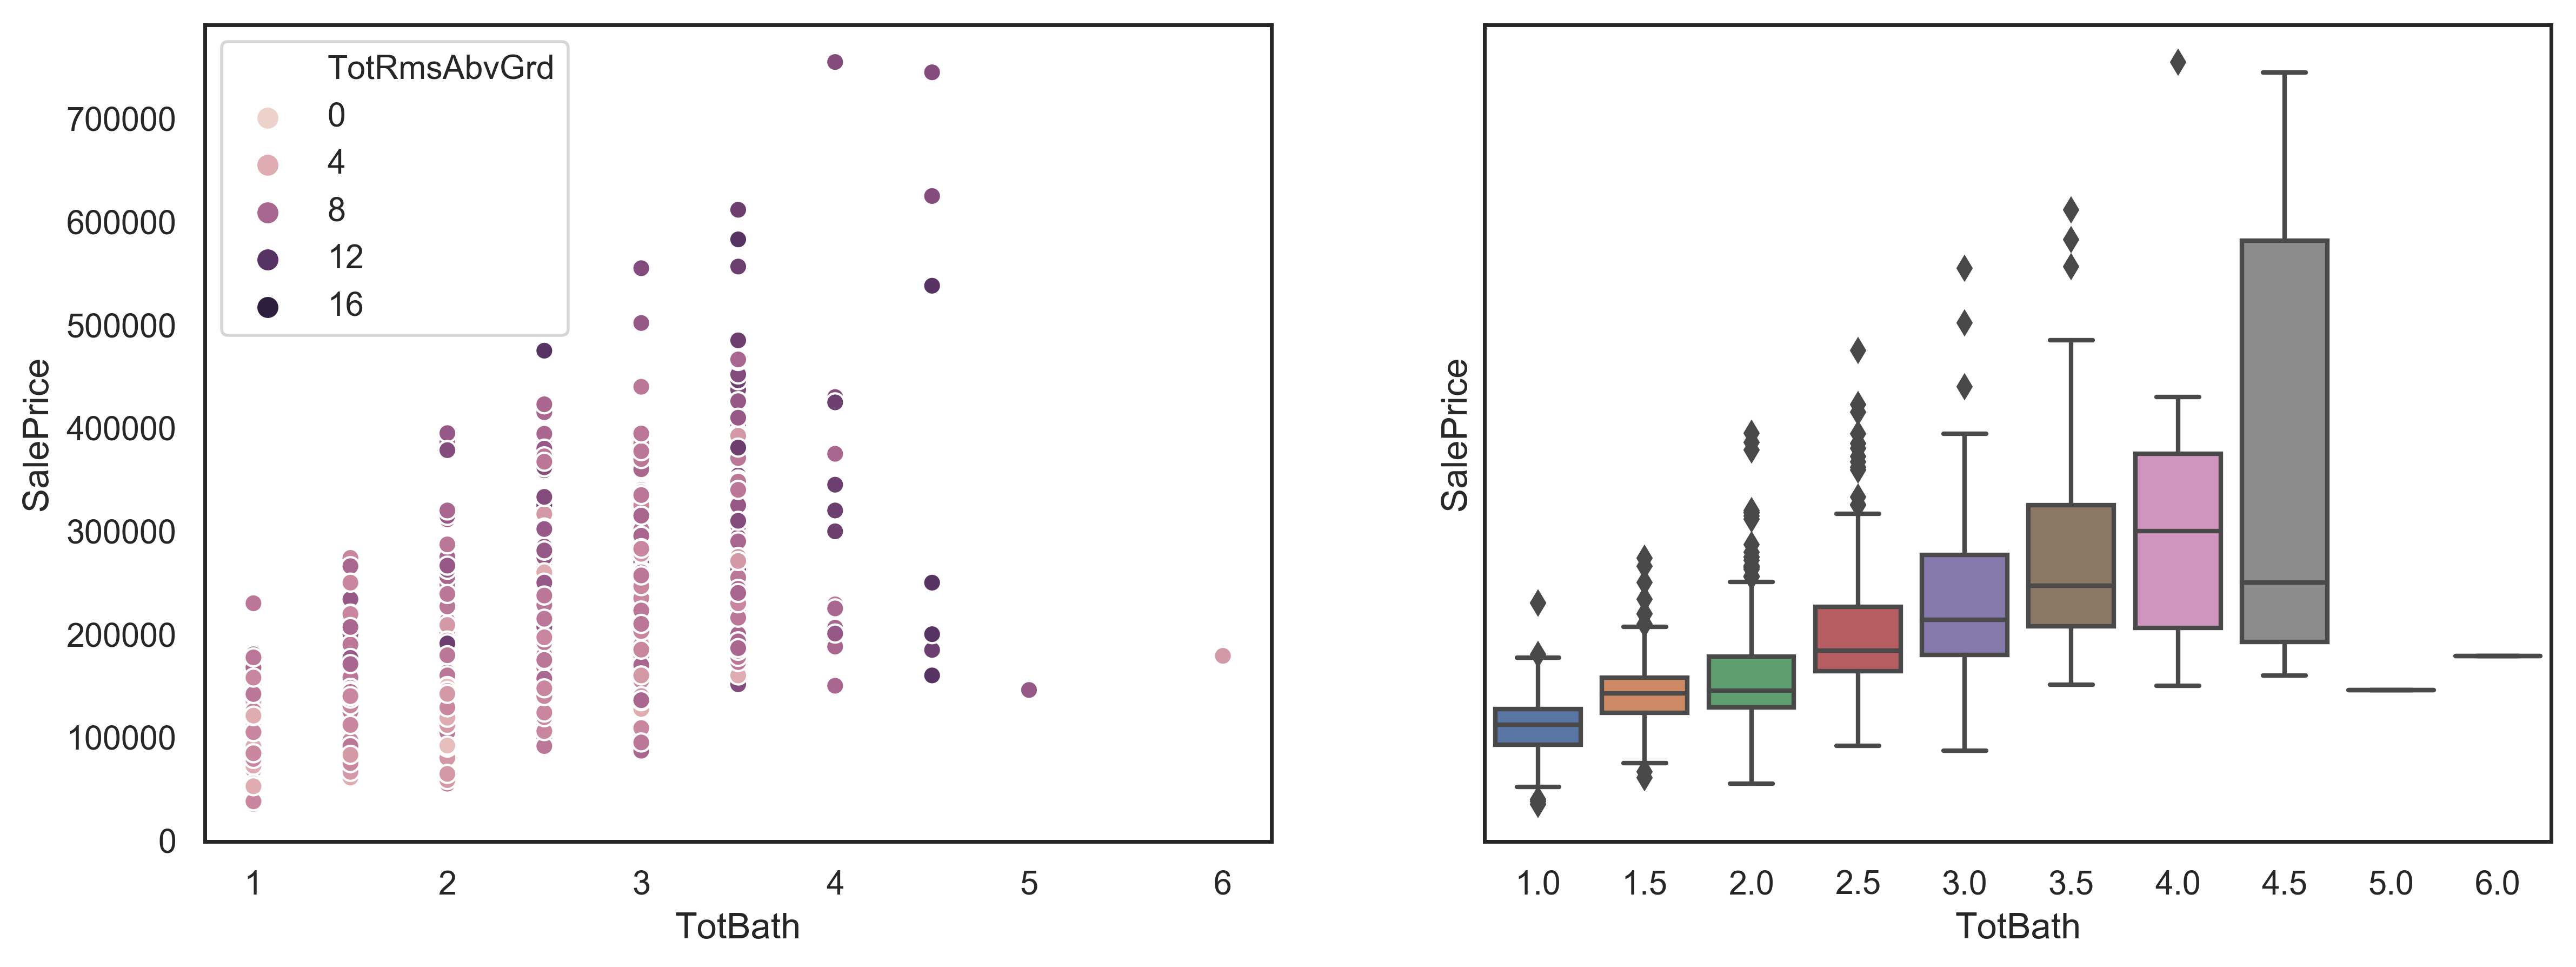

In [384]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize = (14,5), dpi=400)
sns.scatterplot("TotBath", "SalePrice", data = bedbaths, hue = "TotRmsAbvGrd", ax=axs[0])
sns.boxplot("TotBath", "SalePrice", data = bedbaths, ax = axs[1])

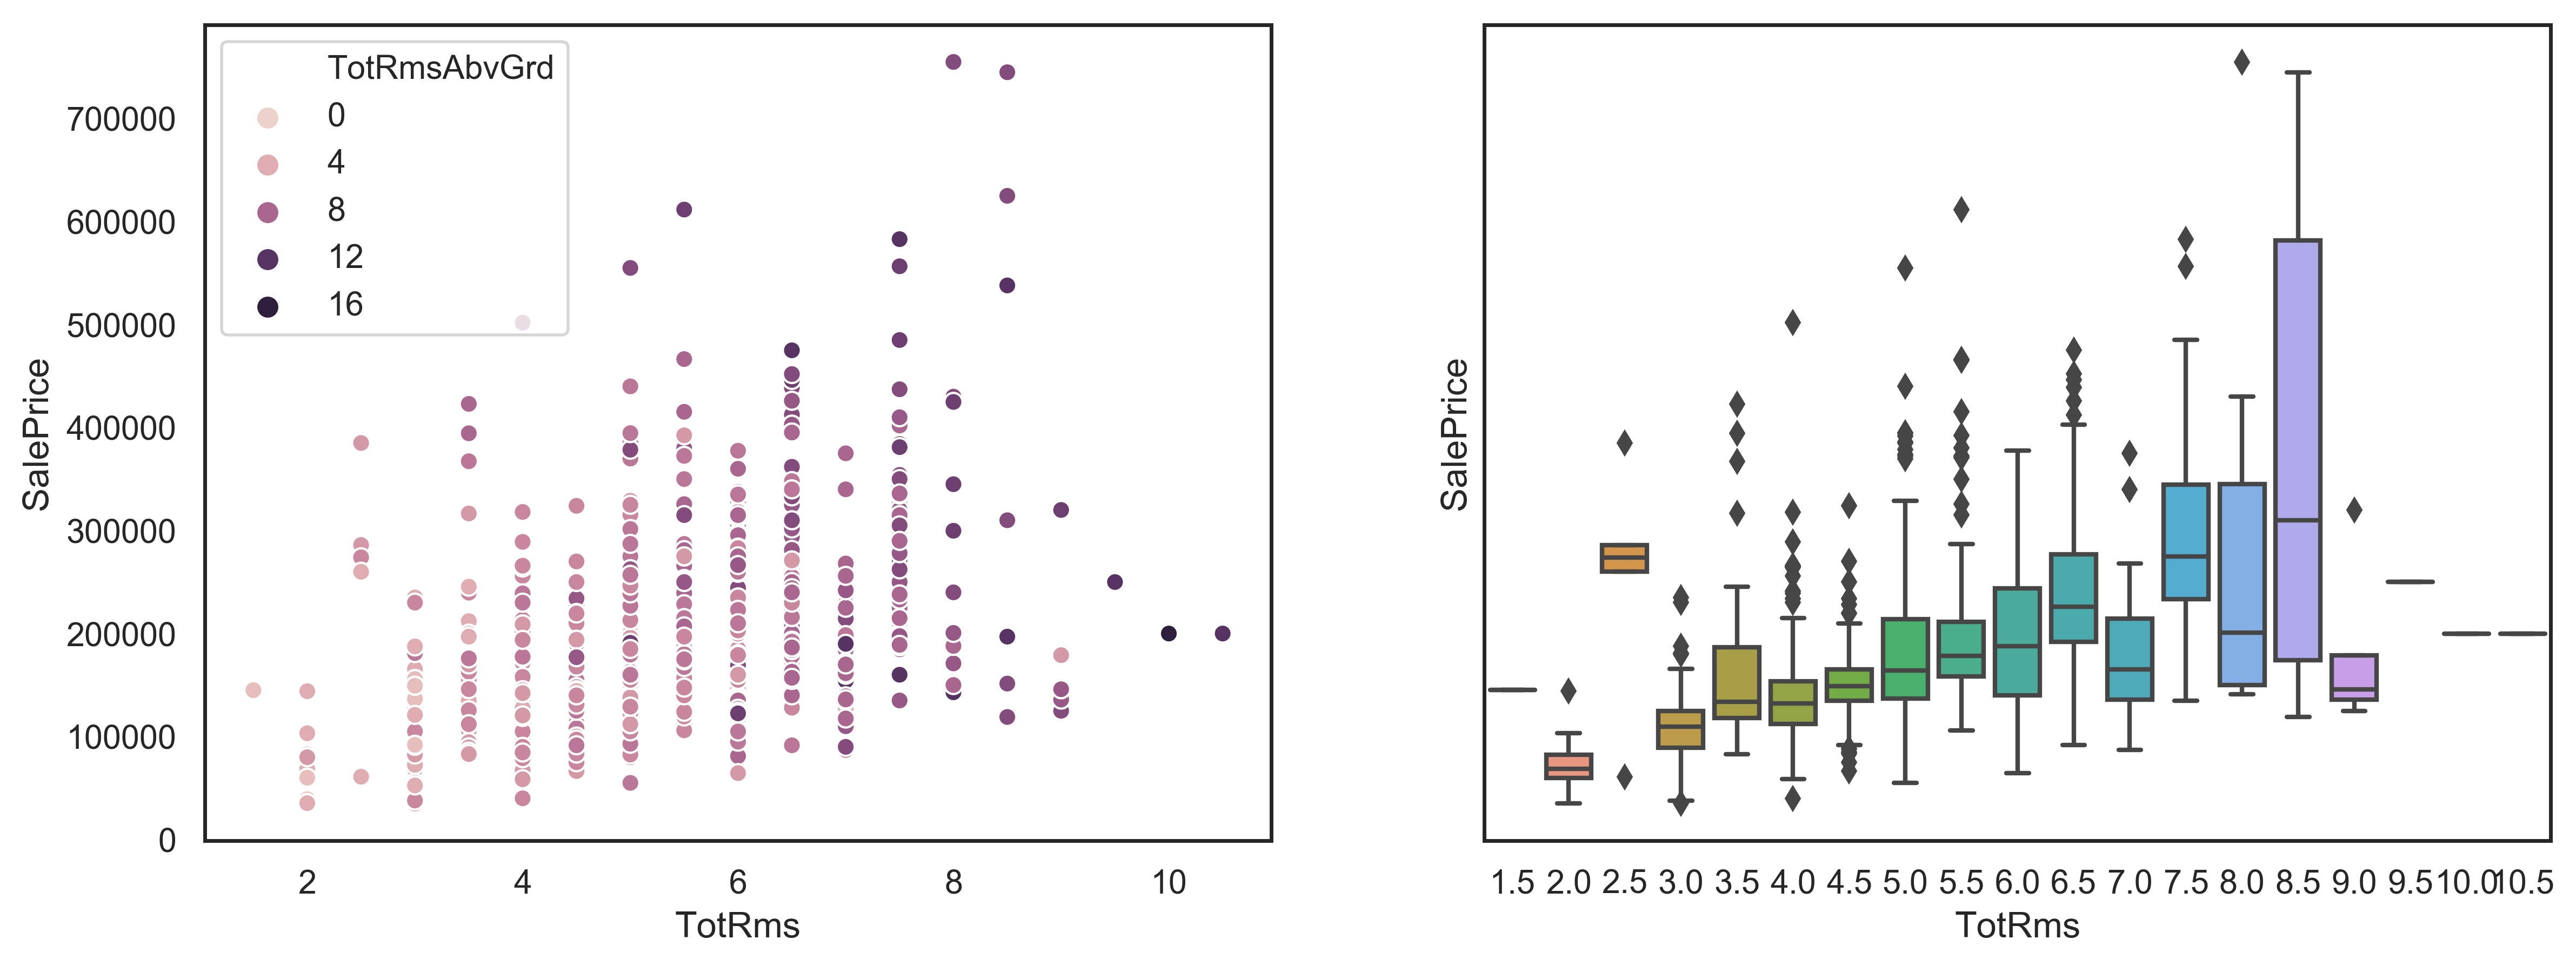

In [385]:
bedbaths["TotRms"] = bedbaths.FullBath + bedbaths.BsmtFullBath + bedbaths.HalfBath/2 + bedbaths.BsmtHalfBath/2 + bedbaths.BedroomAbvGr
fig, axs = plt.subplots(ncols=2, sharey=True, figsize = (14,5), dpi=400)
sns.scatterplot("TotRms", "SalePrice", data = bedbaths, hue = "TotRmsAbvGrd", ax=axs[0])
sns.boxplot("TotRms", "SalePrice", data = bedbaths, ax = axs[1])


In [386]:
# PoolQC
# Pool Quality
PoolQC = train_df["PoolQC"].fillna(value="NA")
print(PoolQC.value_counts())
# won't continue looking at this, because only 7 houses have pools

NA    1453
Gd       3
Fa       2
Ex       2
Name: PoolQC, dtype: int64


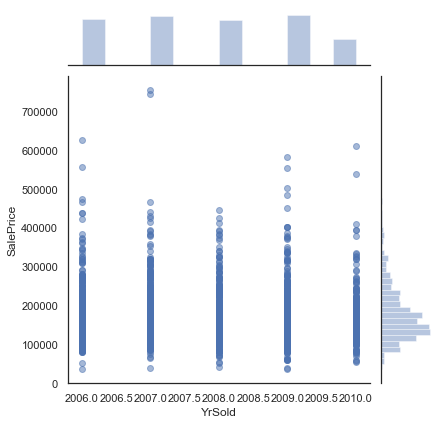

In [387]:
#YrSold
# Year Sold (YYYY)
sns.jointplot("YrSold", "SalePrice", data = train_df, alpha = 0.5)
# Only have data for these years, and it doesn't seem that the year
# affects the sale price distribution within this range, even with housing 
# market bubble bursting during these years

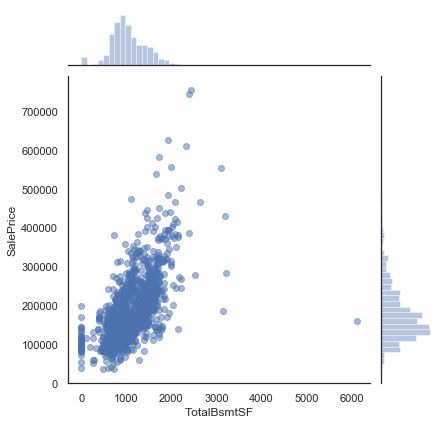

In [388]:
# TotalBsmtSF
# Total square feet of basement area
sns.jointplot("TotalBsmtSF", "SalePrice", data = train_df, alpha = 0.5)
# appears to have a strong linear correlation

### Conclusion:
<strong>Some important variables clearly correlated to SalePrice are:</strong>
* Neighborhood
* OverallQual
* GrLivArea
* TotalBsmtSF
* YearBuilt

# Analyze Independent Variables<a class="anchor" id="third-bullet"></a>

#### Look at the correlation of all numerical variables to SalePrice

In [389]:
#train_df.drop('Id', axis = 1, inplace=True)
train_df.corrwith(train_df.SalePrice).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float

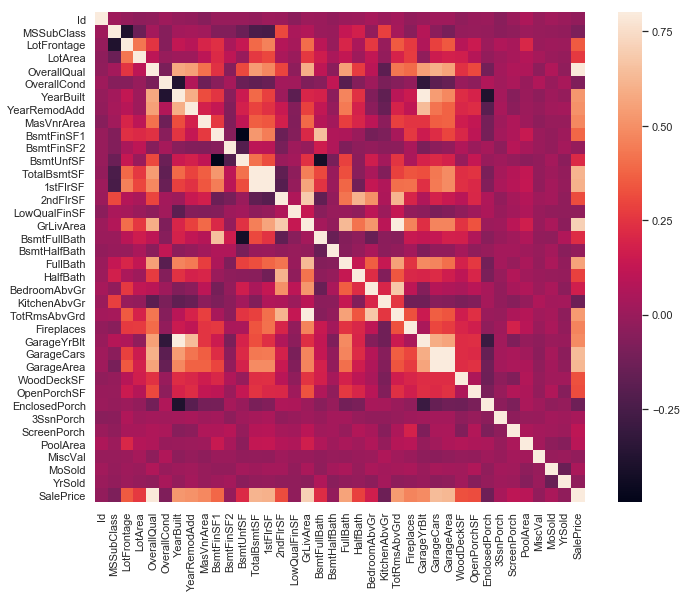

In [390]:
# visualize correlation between variables matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [391]:

# from the SalePrice column of the matrix, get the top 10 most correlated
cols = corrmat.sort_values('SalePrice', ascending=False)['SalePrice'].nlargest(10)
cols

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

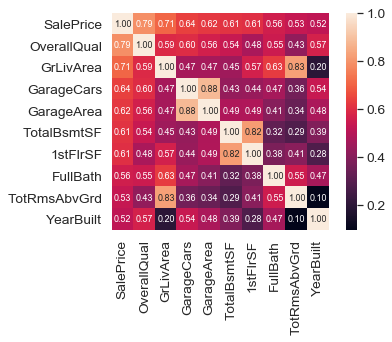

In [392]:
# visualize
mat = np.corrcoef(train_df[cols.index].values.T)
sns.set(font_scale = 1.25)
hmap = sns.heatmap(mat, cbar=True, annot=True, square = True, fmt = '.2f', yticklabels = cols.index, xticklabels = cols.index, annot_kws={'size': 9})
plt.show

* OverallQual, GrLivArea highly correlated to SalePrice
* GarageCars & GarageArea highly correlated to eachother --> only keep 1
* GrLivArea & TotRmsAbvGrd highly correlated, only keep GrLivArea


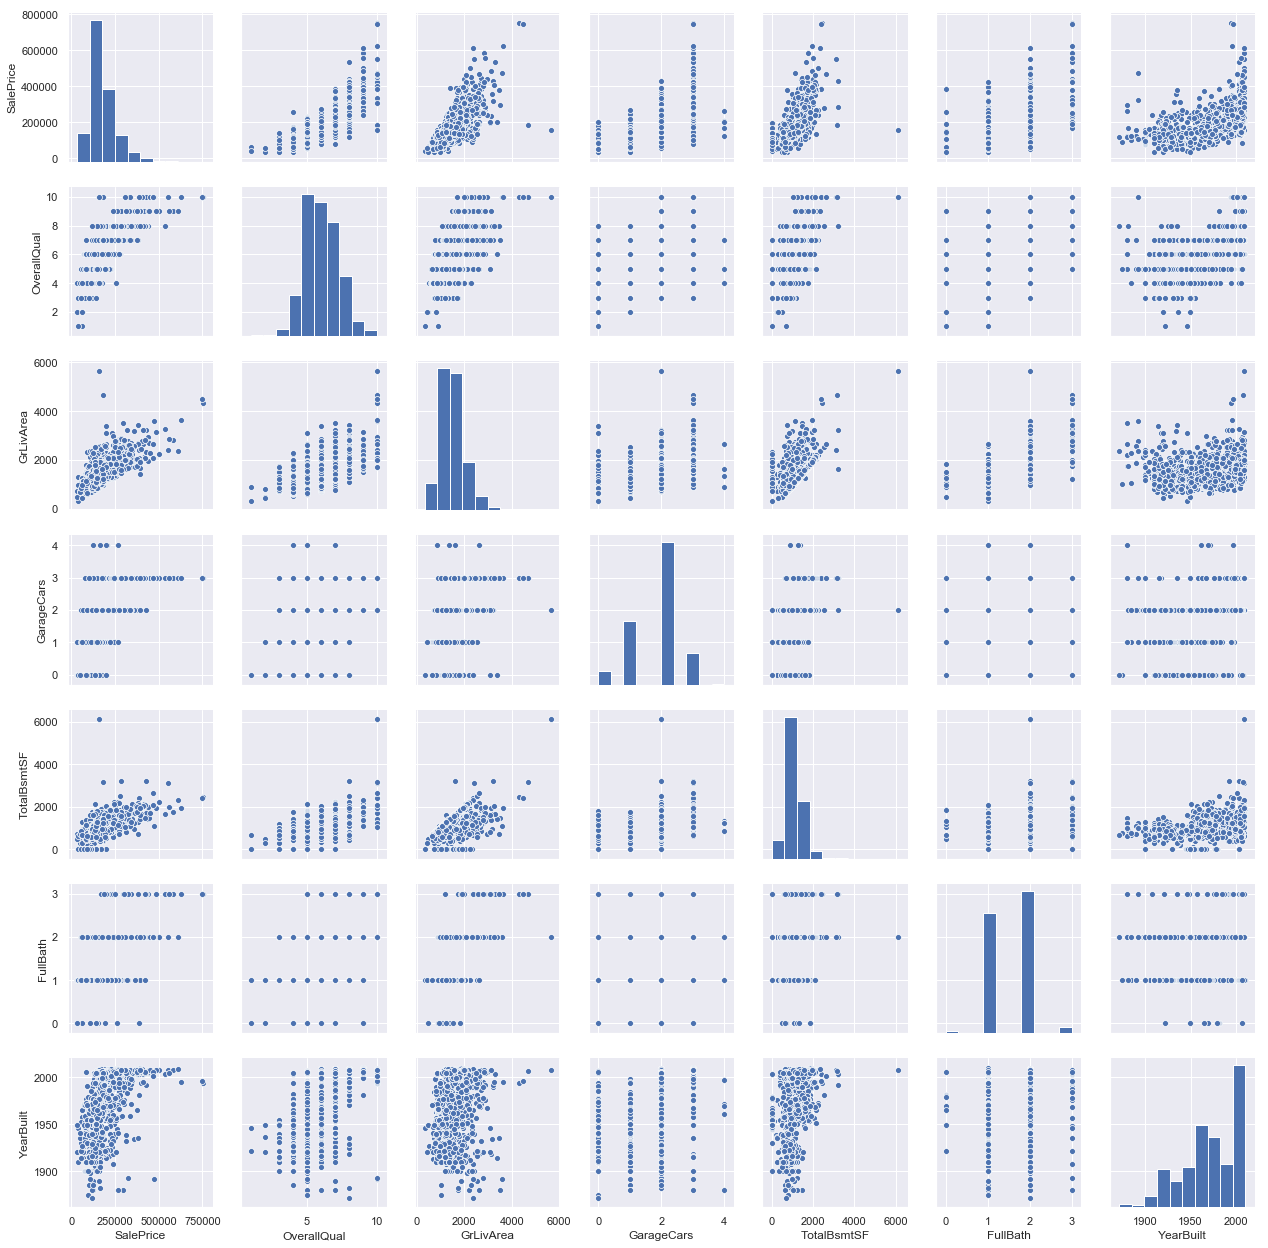

In [393]:
# scatterplots
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show()

* Interesting linear correlation between GrLivArea and TotBsmtSF
* SalePrice and YearBuilt... almost looks exponential. Could we convert this to log scale? 

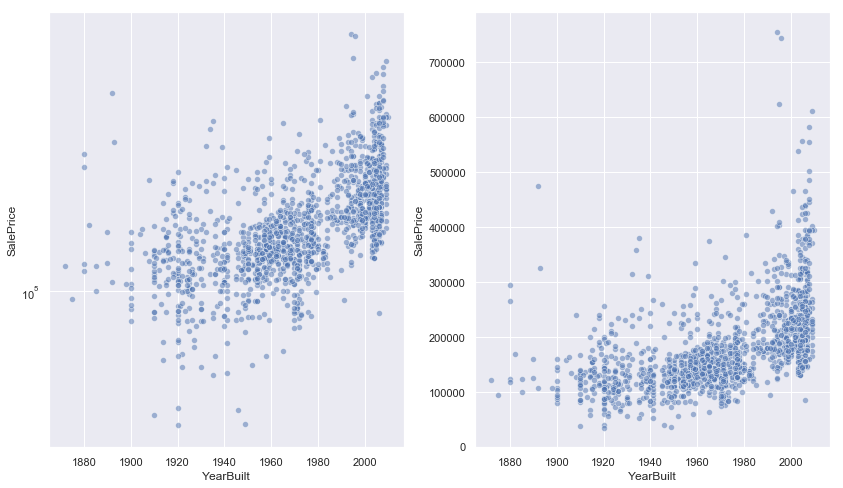

In [394]:
f, ax = plt.subplots(1, 2, figsize=(14, 8))
ax[0].set(yscale='log')
sns.scatterplot(x="YearBuilt", y="SalePrice", data = train_df, ax=ax[0], alpha=0.5)
sns.scatterplot(x="YearBuilt", y="SalePrice", data = train_df, ax=ax[1], alpha=0.5)

Interesting relationship, remember for later

# Missing Data<a class="anchor" id="fourth-bullet"></a>

#### What should we do about missing data?

In [395]:
percent = train_df.isna().sum()/train_df.isna().count().sort_values()
percent = percent[percent > 0].sort_values(ascending = False).to_frame().rename(columns = {0: "Percent"})

In [396]:
# we know that some categories have specific "NA" as a choice, i.e. PoolQC
# but we want this represented as a choice, not a NaN
# Let's look at the columns with nulls in them
na_list = train_df.isna().sum().sort_values(ascending=False).to_frame()
na_list.columns = ["Na"]
na_list = na_list[na_list.Na > 0]
na_list = pd.merge(na_list, percent, how='inner', left_index=True, right_index=True)

na_list

,Na,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


#### Keep or throw away variables?

* PoolQC: 99.5% is missing (99.5% don't have pools) ---> throw away variable
* All variables with > 15% missing, we can throw away. Possibility of overfitting the model if we keep these
* GarageX variables... the value of the garage I think with be better described by either GarageCars or GarageArea, and following that logic then these variables can be deleted. EXCEPT for GarageType...seems to add valuable information
* Same logict for the BsmtX variables --> other variables better describe the value of the basement, so I'd argue to delete these as well
* MasVnrX variables both have around 0.5 correlation to OverallQual, so I think we can delete these variables as well
* Electrical only has one observation missing, so let's delete that observation

In [397]:
na_list.drop('GarageType', axis=0, inplace=True)
na_list.drop('BsmtQual', axis=0, inplace=True)
na_list.drop('BsmtExposure', axis=0, inplace=True)
na_list.drop('LotFrontage', axis=0, inplace=True)

In [398]:
na_list

,Na,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
GarageCond,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
BsmtFinType2,38,0.026027


# Feature Engineering<a class="anchor" id="fifth-bullet"></a>

#### Which variables need to be engineered?

Created a widget to show the relationship between each variable and SalePrice, as well as the spead of variable across GrLivArea vs. SalePrice and OverallQual vs. SalePrice

In [399]:
# refer to John's widget for logic behind dropping/engineering certain variables

In [400]:
# save 'Id' columns for later
train_Id = train_df['Id']
test_Id = test_df['Id']
# drop 'Id' columns
train_df.drop('Id', axis = 1, inplace = True)
test_df.drop('Id', axis = 1, inplace = True)

In [401]:
y_train = train_df['SalePrice']
X_train = train_df.drop('SalePrice', axis = 1)
X_test = test_df.copy()

In [402]:
# delete original dataframes to save memeory
del train_df, test_df

In [403]:
print(X_train.shape)
print(X_test.shape)

(1460, 79)
(1459, 79)


In [404]:
# combine into one dataset for categorical feature engineering
all_data = pd.concat([X_train, X_test], ignore_index = True)
all_data.shape

(2919, 79)

### Variables for Dropping

* Those all in Na_list fro Missing Data Section (except for electrical, BsmtQual, BsmtExposure, LotFrontage)
* PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageCond, GarageType, GarageYrBlt, GarageFinish, GarageQual, BsmtSFinType1, BsmtSFinTyp2, BsmtCond, MasVnrArea, MasVnrType
* Also drop observation from test set that is missing value for 'Electrical' variable

#### Variables that will be dropped because of team discussion:

* RoofMatl
* BsmtHalfBath
* GarageArea (vs. GarageCars)
* YearRemodAdd
* Street 
* LandSlope
* Exterior2nd
* ExterCond
* BsmtFinSF1
* BsmtUnfSF
* BsmtFinSF2
* 1stFlrSF
* 2ndFlrSF
* Kitchen
* PoolArea
* MiscVal
* SaleType

In [405]:
# drop the missing variables
all_data.drop(na_list[na_list.Na > 1].index, axis = 1, inplace=True)
# drop that one observation
all_data.drop(all_data.loc[all_data['Electrical'].isna()].index, axis = 0, inplace = True)

In [406]:
all_data.shape

(2918, 65)

In [407]:
# drop pre-discussed variables
drop_cols = ['RoofMatl', 'BsmtHalfBath', 'GarageArea', 'YearRemodAdd', 'Street', 'LandSlope', 'Exterior2nd', 'ExterCond', 'BsmtFinSF1',
            'BsmtUnfSF', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'PoolArea', 'MiscVal', 'SaleType', 'KitchenAbvGr', 'Utilities']
all_data.drop(drop_cols, axis = 1, inplace = True)

In [408]:
all_data.columns.tolist()

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageCars',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MoSold',
 'YrSold',
 'SaleCondition']

In [409]:
# they kept PoolQC & MasVnrType
all_data.shape

(2918, 47)

### Deal with Missing Values in both Test & Train Sets

There appear to be a few variables missing in the test set.
Best bet may be to impute them using most likely value (mode) of the neighborhood in which the house missing the variable is located. For instance:

* MSZoning (4 houses missing) - impute from mode of neighborhood
* Functional (2 houses missing) - impute from mode of houses with same OverallQual score in neighborhood
* BsmtFullBath (2 houses missing ) - see if they have basements, if not fill with 0
* Exterior1st - see if they have Exterior2nd
* GarageCars - impute from GarageArea
* TotalBsmtSF - see if they have basement, if not impute 0
* KitchenQual - impute most common value from houses with same OverallQual score

In [410]:
all_na = all_data.isna().sum().sort_values(ascending=False).to_frame()
all_na.columns = ["Na"]
all_na = all_na[all_na.Na > 0]
#na_list = pd.merge(na_list, percent, how='inner', left_index=True, right_index=True)

all_na

,Na
LotFrontage,486
GarageType,157
BsmtExposure,82
BsmtQual,81
MSZoning,4
Functional,2
BsmtFullBath,2
Exterior1st,1
GarageCars,1
TotalBsmtSF,1


#### GarageType

In [411]:
# GarageType
# Impute "NA" --> data description says NA = No Garage for this variable
all_data['GarageType'] = all_data['GarageType'].fillna(value = "NA")
all_data['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     185
NA          157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

#### BsmtExposure

In [412]:
# BsmtExposure
# Impute "NA" --> data description says NA = No Basement for this variable
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna(value = "NA")
all_data['BsmtExposure'].value_counts()

No    1903
Av     418
Gd     276
Mn     239
NA      82
Name: BsmtExposure, dtype: int64

#### BsmtQual

In [413]:
# BsmtQual
# Impute "NA" --> data description says NA = No Basement for this variable
all_data['BsmtQual'] = all_data['BsmtQual'].fillna(value = "NA")
all_data['BsmtQual'].value_counts()

TA    1283
Gd    1208
Ex     258
Fa      88
NA      81
Name: BsmtQual, dtype: int64

#### MSZoning

In [414]:
# MSZoning
# 4 observations in test set are missing this variable...
# impute and fill with most common value from that Neighborhood
all_data['MSZoning'].value_counts()

RL         2264
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [415]:
value = {}
for neighborhood in all_data[all_data.MSZoning.isna()]['Neighborhood'].unique():
    value[neighborhood] = (X_train[X_train['Neighborhood'] == neighborhood]['MSZoning'].mode()[0])
value

{'IDOTRR': 'RM', 'Mitchel': 'RL'}

In [416]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['Neighborhood'].map(value))
all_data.MSZoning.value_counts()

RL         2265
RM          463
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

#### Functional

In [417]:
# Functional
# impute from most common score amoung houses with same overallQual score
all_data[all_data['Functional'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtExposure,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleCondition
2216,20,RM,80.0,14584,Reg,Low,Inside,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,Gable,AsbShng,Fa,Slab,NA,NA,0.0,Wall,Po,N,FuseA,0,733,0.0,1,0,2,Fa,4,NaN,0,Attchd,2.0,N,0,0,0,0,0,2,2008,Abnorml
2473,50,RM,60.0,10320,Reg,Lvl,Corner,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,Gable,Wd Sdng,Fa,CBlock,TA,No,771.0,GasA,Fa,Y,SBrkr,114,1484,0.0,2,0,3,TA,6,NaN,0,Detchd,1.0,N,14,211,0,0,84,9,2007,Abnorml


In [418]:
value = {}
for i in range(0, len(all_data[all_data.Functional.isna()])):
    qual, cond, neigh = all_data[all_data.Functional.isna()][['OverallQual', 'SaleCondition', 'Neighborhood']].iloc[i]
    value[qual] = X_train[(X_train['SaleCondition'] == cond) & (X_train['Neighborhood'] == neigh) & (X_train['Functional'].isin(X_train[(X_train['OverallQual'] == qual)]['Functional'].unique()))]['Functional'].mode()[0]

value

{1: 'Typ', 4: 'Typ'}

In [419]:
all_data['Functional'] = all_data['Functional'].fillna(all_data['OverallQual'].map(value))
all_data.Functional.isna().sum()

0

#### BsmtFullBath

In [420]:
# BsmtFullBath
# Do the missing observations have basments?
all_data[all_data['BsmtFullBath'].isna()]
# looks like neither of these houses have basements

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtExposure,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleCondition
2120,20,RM,99.0,5940,IR1,Lvl,FR3,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,Gable,MetalSd,TA,PConc,NA,NA,NaN,GasA,TA,Y,FuseA,0,896,NaN,1,0,2,TA,4,Typ,0,Detchd,1.0,Y,0,0,0,0,0,4,2008,Abnorml
2188,20,RL,123.0,47007,IR1,Lvl,Inside,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,Gable,Plywood,TA,Slab,NA,NA,0.0,GasA,TA,Y,SBrkr,0,3820,NaN,3,1,5,Ex,11,Typ,2,Attchd,2.0,Y,0,372,0,0,0,7,2008,Normal


In [421]:
# fill will 0
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(value=0)
all_data['BsmtFullBath'].isna().sum()

0

#### Exterior1st

In [422]:
# Exterior1st
all_data[all_data['Exterior1st'].isna()]
# Fill with 'other' --> impute most common value for neighborhood and overallqual

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtExposure,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleCondition
2151,30,RL,85.0,19550,Reg,Lvl,Inside,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,Flat,NaN,TA,PConc,TA,Gd,1580.0,GasA,Ex,Y,SBrkr,0,1518,1.0,1,0,2,Fa,5,Typ,2,NA,0.0,Y,0,39,0,0,0,1,2008,Normal


In [423]:
value = {}
for i in range(0, len(all_data[all_data.Exterior1st.isna()])):
    qual, neigh = all_data[all_data.Exterior1st.isna()][['OverallQual', 'Neighborhood']].iloc[i]
    value[qual] = X_train[(X_train['Neighborhood'] == neigh) & (X_train['OverallQual'] == 5)]['Exterior1st'].mode()[0]

value 

{5: 'MetalSd'}

In [424]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['OverallQual'].map(value))
all_data['Exterior1st'].isna().sum()

0

#### GarageCars

In [425]:
# GarageCars
X_test[X_test['GarageCars'].isna()]
# this observation is missing all garage variables except GarageType: Detchd
# impute median GarageCars for this garage type and this neighborhood

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1116,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [426]:
value = {}
for i in range(0, len(all_data[all_data['GarageCars'].isna()])):
    gtype, neigh = all_data[all_data['GarageCars'].isna()][['GarageType', 'Neighborhood']].iloc[i]
    value[gtype] = X_train[(X_train['GarageType'] == gtype) & (X_train['Neighborhood'] == neigh)]['GarageCars'].median()
value

{'Detchd': 1.0}

In [427]:
all_data['GarageCars'] = all_data['GarageCars'].fillna(all_data['GarageType'].map(value))
all_data['GarageCars'].isna().sum()

0

#### TotalBsmtSF

In [428]:
# TotalBsmtSF
# does this observation have a basement? No, we know from looking at BsmtFullBath. One of those observations was the one without TotalBsmtSF
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(value=0)
all_data['TotalBsmtSF'].isna().sum()

0

#### KitchenQual

In [429]:
# KitchenQual
X_test[X_test['KitchenQual'].isna()]
# impute most common condition for OverallQual & Neighborhood

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,50,RL,72.0,10632,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NaN,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal


In [430]:
value = {}
for i in range(0, len(all_data[all_data['KitchenQual'].isna()])):
    qual, neigh = all_data[all_data['KitchenQual'].isna()][['OverallQual', 'Neighborhood']].iloc[i]
    value[qual] = X_train[(X_train['OverallQual'] == qual) & (X_train['Neighborhood'] == neigh)]['KitchenQual'].mode()[0]
value


{5: 'TA'}

In [431]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['OverallQual'].map(value))
all_data['KitchenQual'].isna().sum()

0

#### LotFrontage

In [432]:
all_data.columns[all_data.isna().sum() > 0]
# Yay, only lot frontage has missing values!

Index(['LotFrontage'], dtype='object')

In [433]:
X_test['LotFrontage'].isna().sum()

227

In [434]:
X_train['LotFrontage'].isna().sum()

259

In [435]:
all_data.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [436]:
X_train.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [437]:
# when dropped, non-reg linear regression r2=0.81

# impute median neighborhood values from X_train to fill dataframe
neighborhoods = X_train.Neighborhood.unique()

# groupby 'Neighborhood' and calculate median and change to dictionary for easy mapping
LF_medians = X_train.groupby('Neighborhood')['LotFrontage'].median().to_dict()

# fill na values
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['Neighborhood'].map(LF_medians))
all_data['LotFrontage'].isna().sum()

0

### Variables for Binary Encoding

* Heating --> Binary for GasA or not
* LowQualFinSF -- > Binary for 0 or above 0
* HalfBath --> Binary is there a half bath or not
* Functional --> is it Typ or not
* LotShape --> Binary for regular vs. irregular
* OverallCond --> Binary: is 7, 8, 9 or greater
* HeatingQC --> Binary is it excellent?
* Electrical --> Binary breaker or fuse
* Fireplaces --> binary
* PavedDrive --> Binary yes or no (combine not paved with poorly paved)
* BsmtExposure --> combine 'Av' and 'Gd'

In [438]:
bi_data = all_data.copy()

In [439]:
del all_data

#### BsmtExposure

In [440]:
bi_data['BsmtExposure'].value_counts()

No    1903
Av     418
Gd     276
Mn     239
NA      82
Name: BsmtExposure, dtype: int64

In [441]:
# binary
# 1 = Av or Gd
# 0 = No, Mn, NA
bi_data['BsmtExposure_AvGd'] = bi_data['BsmtExposure'].apply(lambda x: 1 if x in ['Av', 'Gd'] else 0)
bi_data['BsmtExposure_AvGd'].value_counts()

0    2224
1     694
Name: BsmtExposure_AvGd, dtype: int64

In [442]:
bi_data.drop('BsmtExposure', axis = 1, inplace = True)

#### Heating

In [443]:
# Heating
bi_data['Heating'].value_counts()

GasA     2873
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

In [444]:
# binary
# 1 = GasA
# 0 = GasW, Grav, Wall, OthW, Floor
bi_data['Heating_GasA'] = bi_data["Heating"].apply(lambda x: 1 if x == 'GasA' else 0)
bi_data['Heating_GasA'].value_counts()

1    2873
0      45
Name: Heating_GasA, dtype: int64

In [445]:
bi_data.drop('Heating', axis = 1, inplace = True)

#### LowQualFinSF

In [446]:
# LowQualFinSF
# 0 = 0
# 1 = has low quality finished space in house
bi_data['LowQualFin'] = bi_data['LowQualFinSF'].where(bi_data['LowQualFinSF'] == 0, 1)
bi_data['LowQualFin'].value_counts()

0    2878
1      40
Name: LowQualFin, dtype: int64

In [447]:
bi_data.drop('LowQualFinSF', axis = 1, inplace = True)

#### HalfBath

In [448]:
# HalfBath
# 0 = 0
# 1 = has at least 1 half bath in above ground living area
bi_data['HalfBath_atleast1'] = bi_data['HalfBath'].where(bi_data['HalfBath'] == 0, 1)
bi_data['HalfBath_atleast1'].value_counts()

0    1834
1    1084
Name: HalfBath_atleast1, dtype: int64

In [449]:
bi_data.drop('HalfBath', axis = 1, inplace = True)

#### Functional

In [233]:
# Functional
bi_data['Functional'].value_counts()

Typ     2718
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [450]:
# binary
# 0 = Typ
# 1 = Min2, Min1, Mod, Maj1, Maj2, Sev
bi_data['Functional_damaged'] = bi_data["Functional"].apply(lambda x: 1 if x == 'Typ' else 0)
bi_data['Functional_damaged'].value_counts()

1    2718
0     200
Name: Functional_Typ, dtype: int64

In [451]:
bi_data.drop('Functional', axis = 1, inplace = True)

#### LotShape

In [235]:
# LotShape
bi_data['LotShape'].value_counts()

Reg    1858
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [452]:
# binary
# 1 = Reg
# 0 = IR1, IR2, IR3
bi_data['LotShape_Reg']= bi_data['LotShape'].apply(lambda x: 1 if x == 'Reg' else 0)
bi_data['LotShape_Reg'].value_counts()

1    1858
0    1060
Name: LotShape_Reg, dtype: int64

In [453]:
bi_data.drop('LotShape', axis = 1, inplace = True)

#### OverallCond

In [454]:
# OverallCond
# Binary for >= 7
# 0 ---> OverallCond score less than 7
# 1 ---> OverallCond score greater than or equal to 7
bi_data['OverallCond_above7'] = bi_data['OverallCond'].apply(lambda x: 1 if x >=7 else 0)
bi_data['OverallCond_above7'].value_counts()

0    2343
1     575
Name: OverallCond_above7, dtype: int64

In [455]:
bi_data.drop('OverallCond', axis = 1, inplace = True)

#### HeatingQC

In [238]:
# HeatingQC
bi_data['HeatingQC'].value_counts()

Ex    1493
TA     857
Gd     473
Fa      92
Po       3
Name: HeatingQC, dtype: int64

In [456]:
# 1 = Ex
# 0 = TA, Gd, Fa, Po
bi_data['HeatingQC_Ex']= bi_data['HeatingQC'].apply(lambda x: 1 if x == 'Ex' else 0)
bi_data['HeatingQC_Ex'].value_counts()

1    1493
0    1425
Name: HeatingQC_Ex, dtype: int64

In [457]:
bi_data.drop('HeatingQC', axis = 1, inplace = True)

#### Electrical

In [240]:
# Electrical
bi_data['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [459]:
# Binary
# 1 = SBrkr
# 0 = FuseA, FuseF, FuseP, Mix
bi_data['Electrical_Brkr'] = bi_data['Electrical'].apply(lambda x: 1 if x == 'SBrkr' else 0)
bi_data['Electrical_Brkr'].value_counts()

1    2671
0     247
Name: Electrical_Brkr, dtype: int64

In [460]:
bi_data.drop('Electrical', axis = 1, inplace = True)

#### Fireplaces

In [461]:
# Fireplaces
# 1 = has at least one fireplace
# 0 = has no fireplaces
bi_data['Fireplaces_atleast1'] = bi_data['Fireplaces'].where(bi_data['Fireplaces'] == 0, 1)
bi_data['Fireplaces_atleast1'].value_counts()

1    1499
0    1419
Name: Fireplaces_atleast1, dtype: int64

In [462]:
bi_data.drop('Fireplaces', axis = 1, inplace = True)

#### PavedDrive

In [463]:
# PavedDrive
# 1 = Y
# 0 = N or P
bi_data['PavedDrive_Y'] = bi_data['PavedDrive'].apply(lambda x: 1 if x == 'Y' else 0)
bi_data['PavedDrive_Y'].value_counts()

1    2640
0     278
Name: PavedDrive_Y, dtype: int64

In [464]:
bi_data.drop('PavedDrive', axis = 1, inplace = True)

### New Variables

* WoodDeck: Y or N
* Porch: Open, Enclosed, 3Ssn, Screen 

* Condition, Condition 1 + Condition 2
 * Artery Adjacent to arterial street
 * Feedr Adjacent to feeder street	
 * Norm	Normal	
 * RRNn	Within 200' of North-South Railroad
 * RRAn	Adjacent to North-South Railroad
 * PosN	Near positive off-site feature--park, greenbelt, etc.
 * PosA	Adjacent to postive off-site feature
 * RRNe	Within 200' of East-West Railroad
 * RRAe	Adjacent to East-West Railroad
 

* BldgType (new categories)): combine TwnhsE+Twnhs = Twnhs, 2fmCon+Duplex = 2fam, 1fmCon = 1fam
* MSSubClass: change to string so models don't treat it as ordinal

 

In [466]:
new_data = bi_data.copy()

In [467]:
del bi_data

In [468]:
new_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'RoofStyle', 'Exterior1st',
       'ExterQual', 'Foundation', 'BsmtQual', 'TotalBsmtSF', 'CentralAir',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageType', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold',
       'SaleCondition', 'BsmtExposure_AvGd', 'Heating_GasA', 'LowQualFin',
       'HalfBath_atleast1', 'Functional_Typ', 'LotShape_Reg',
       'OverallCond_above7', 'HeatingQC_Ex', 'Electrical_Brkr',
       'Fireplaces_atleast1', 'PavedDrive_Y'],
      dtype='object')

#### YearBuilt

In [470]:
# enforce a minimum value of 1950

new_data['YearBuilt'] = new_data['YearBuilt'].apply(lambda x: 1950 if x < 1950 else x)

#### Lot Area

In [471]:
from math import log

# make LotArea logarithmic
new_data['LotArea'] = new_data['LotArea'].apply(log)

#### WoodDeck

In [472]:
# Create WoodDeck Variable
# 0 for no wood deck, 1 for wood deck
new_data[new_data.WoodDeckSF == 0]['WoodDeckSF'].value_counts()

0    1523
Name: WoodDeckSF, dtype: int64

In [473]:
new_data['WoodDeck'] = np.where(new_data['WoodDeckSF'] > 0, 1, 0)
new_data['WoodDeck'].value_counts()

0    1523
1    1395
Name: WoodDeck, dtype: int64

In [250]:
# don't drop WoodDeckSF, want this parameter
#new_data.drop('WoodDeckSF', axis = 1, inplace=True)

#### Porch Variables

In [474]:
# create binary porch variables
# 0 for no porch of this type, 1 for having porch of this type
# check for number of zeros before new columns
print(new_data[new_data['OpenPorchSF'] == 0]['OpenPorchSF'].value_counts())
print(new_data[new_data['EnclosedPorch'] == 0]['EnclosedPorch'].value_counts())
print(new_data[new_data['3SsnPorch'] == 0]['3SsnPorch'].value_counts())
print(new_data[new_data['ScreenPorch'] == 0]['ScreenPorch'].value_counts())

0    1297
Name: OpenPorchSF, dtype: int64
0    2459
Name: EnclosedPorch, dtype: int64
0    2881
Name: 3SsnPorch, dtype: int64
0    2662
Name: ScreenPorch, dtype: int64


In [513]:
# change columns
new_data['Porch_Open'] = np.where(new_data['OpenPorchSF'] > 0, 1, 0)
new_data['Porch_Enclosed'] = np.where(new_data['EnclosedPorch'] > 0, 1, 0)
new_data['Porch_3Ssn'] = np.where(new_data['3SsnPorch'] > 0, 1, 0)
new_data['Porch_Screen'] = np.where(new_data['ScreenPorch'] > 0, 1, 0)

# create PorchSF column
new_data['PorchSF'] = new_data.loc[:,['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].apply(np.sum, axis = 1)


0     61
1      0
2     42
3    307
4     84
Name: PorchSF, dtype: int64

In [514]:
# check if consistent with old columns
print(new_data['Porch_Open'].value_counts())
print(new_data['Porch_Enclosed'].value_counts())
print(new_data['Porch_3Ssn'].value_counts())
print(new_data['Porch_Screen'].value_counts())

1    1621
0    1297
Name: Porch_Open, dtype: int64
0    2459
1     459
Name: Porch_Enclosed, dtype: int64
0    2881
1      37
Name: Porch_3Ssn, dtype: int64
0    2662
1     256
Name: Porch_Screen, dtype: int64


In [515]:
# drop old OpenPorchSF column
new_data.drop('OpenPorchSF', axis = 1, inplace=True)
new_data.drop('EnclosedPorch', axis = 1, inplace=True)
new_data.drop('3SsnPorch', axis = 1, inplace=True)
new_data.drop('ScreenPorch', axis = 1, inplace=True)

In [516]:
new_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'RoofStyle', 'Exterior1st',
       'ExterQual', 'Foundation', 'BsmtQual', 'TotalBsmtSF', 'CentralAir',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageType', 'GarageCars', 'WoodDeckSF', 'MoSold',
       'YrSold', 'SaleCondition', 'BsmtExposure_AvGd', 'Heating_GasA',
       'LowQualFin', 'HalfBath_atleast1', 'Functional_Typ', 'LotShape_Reg',
       'OverallCond_above7', 'HeatingQC_Ex', 'Electrical_Brkr',
       'Fireplaces_atleast1', 'PavedDrive_Y', 'WoodDeck', 'Porch_Open',
       'Porch_Enclosed', 'Porch_3Ssn', 'Porch_Screen', 'PorchSF'],
      dtype='object')

#### Condition Variables

In [517]:
# 2510 observations that are both normal, so drop that column
#new_data['Cond_Norm'] = np.where(new_data['Condition1'] == "Norm", 1, 0) + np.where(new_data['Condition2'] == "Norm", 1, 0)
new_data['Cond_Feedr'] = np.where(new_data['Condition1'] == "Feedr", 1, 0) + np.where(new_data['Condition2'] == "Feedr", 1, 0)
new_data['Cond_Artery'] = np.where(new_data['Condition1'] == "Artery", 1, 0) + np.where(new_data['Condition2'] == "Artery", 1, 0)
new_data['Cond_RRAn'] = np.where(new_data['Condition1'] == "RRAn", 1, 0) + np.where(new_data['Condition2'] == "RRAn", 1, 0)
new_data['Cond_PosN'] = np.where(new_data['Condition1'] == "PosN", 1, 0) + np.where(new_data['Condition2'] == "PosN", 1, 0)
new_data['Cond_RRAe'] = np.where(new_data['Condition1'] == "RRAe", 1, 0) + np.where(new_data['Condition2'] == "RRAe", 1, 0)
new_data['Cond_PosA'] = np.where(new_data['Condition1'] == "PosA", 1, 0) + np.where(new_data['Condition2'] == "PosA", 1, 0)
new_data['Cond_RRNn'] = np.where(new_data['Condition1'] == "RRNn", 1, 0) + np.where(new_data['Condition2'] == "RRNn", 1, 0)
new_data['Cond_RRNe'] = np.where(new_data['Condition1'] == "RRNe", 1, 0) + np.where(new_data['Condition2'] == "RRNe", 1, 0)

In [519]:
# check if Norm column working
print("Both Norm:", new_data[(new_data.Condition1 == "Norm") & (new_data.Condition2 == "Norm")]['MSSubClass'].count())
print("1st Not Norm, 2nd Norm:", new_data[(new_data.Condition1 != "Norm") & (new_data.Condition2 == "Norm")]['MSSubClass'].count())
print("1st Norm, 2nd Not Norm", new_data[(new_data.Condition1 == "Norm") & (new_data.Condition2 != "Norm")]['MSSubClass'].count())
print("Neither Norm", new_data[(new_data.Condition1 != "Norm") & (new_data.Condition2 != "Norm")]['MSSubClass'].count())

Both Norm: 2510
1st Not Norm, 2nd Norm: 378
1st Norm, 2nd Not Norm 0
Neither Norm 30


In [521]:
# check if consistent with old columns
#print(new_data['Cond_Norm'].value_counts())
print(new_data['Cond_Feedr'].value_counts())
print(new_data['Cond_Artery'].value_counts())
print(new_data['Cond_RRAn'].value_counts())
print(new_data['Cond_PosN'].value_counts())
print(new_data['Cond_PosA'].value_counts())
print(new_data['Cond_RRNn'].value_counts())
print(new_data['Cond_RRNe'].value_counts())
print(new_data['Cond_RRAe'].value_counts())

0    2745
1     169
2       4
Name: Cond_Feedr, dtype: int64
0    2823
1      93
2       2
Name: Cond_Artery, dtype: int64
0    2867
1      51
Name: Cond_RRAn, dtype: int64
0    2879
1      35
2       4
Name: Cond_PosN, dtype: int64
0    2897
1      18
2       3
Name: Cond_PosA, dtype: int64
0    2907
1      11
Name: Cond_RRNn, dtype: int64
0    2912
1       6
Name: Cond_RRNe, dtype: int64
0    2889
1      29
Name: Cond_RRAe, dtype: int64


In [522]:
# drop condition1 and condition2
new_data.drop('Condition1', axis=1, inplace=True)
new_data.drop('Condition2', axis=1, inplace=True)

In [523]:
new_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LandContour',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation',
       'BsmtQual', 'TotalBsmtSF', 'CentralAir', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'GarageType',
       'GarageCars', 'WoodDeckSF', 'MoSold', 'YrSold', 'SaleCondition',
       'BsmtExposure_AvGd', 'Heating_GasA', 'LowQualFin', 'HalfBath_atleast1',
       'Functional_Typ', 'LotShape_Reg', 'OverallCond_above7', 'HeatingQC_Ex',
       'Electrical_Brkr', 'Fireplaces_atleast1', 'PavedDrive_Y', 'WoodDeck',
       'Porch_Open', 'Porch_Enclosed', 'Porch_3Ssn', 'Porch_Screen', 'PorchSF',
       'Cond_Feedr', 'Cond_Artery', 'Cond_RRAn', 'Cond_PosN', 'Cond_RRAe',
       'Cond_PosA', 'Cond_RRNn', 'Cond_RRNe'],
      dtype='object')

In [524]:
len(new_data.columns)

55

#### MSSubClass

In [525]:
# need to change MSSubClass into string, so that the models don't treat the classes as numbers
new_data['MSSubClass'] = new_data['MSSubClass'].map(str)

In [526]:
new_data.MSSubClass.dtypes

dtype('O')

#### BldgType

In [527]:
# BuildingType
# Twnhs, 2Fam, 1Fam
new_data.BldgType.value_counts()

1Fam      2424
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [529]:
bldgs = {'1Fam': ['1Fam'], 'Twnhs': ['TwnhsE', 'Twnhs'], '2Fam': ['2fmCon', 'Duplex']}

In [530]:
new_data['BldgType'] = new_data['BldgType'].apply(lambda x: [key for key, values in bldgs.items() if x in values][0])
new_data['BldgType'].value_counts()

1Fam     2424
Twnhs     323
2Fam      171
Name: BldgType, dtype: int64

#### ExterQual & BsmtQual

In [532]:
grouped_ratings = {'Ex': ['Ex'], 'Gd': ['Gd'], 'Ave': ['TA', 'Fa', 'Po'], 'NA': ['NA']}

In [533]:
new_data['ExterQual'] = new_data['ExterQual'].apply(lambda x: [key for key, values in grouped_ratings.items() if x in values][0])
new_data['ExterQual'].value_counts()

Ave    1832
Gd      979
Ex      107
Name: ExterQual, dtype: int64

In [534]:
new_data['BsmtQual'] = new_data['BsmtQual'].apply(lambda x: [key for key, values in grouped_ratings.items() if x in values][0])
new_data['BsmtQual'].value_counts()

Ave    1371
Gd     1208
Ex      258
NA       81
Name: BsmtQual, dtype: int64

#### CentralAir

In [542]:
# convert to numerical
# 1 = has central air
# 0 = doesn't have central air
new_data['CentralAir'] = new_data['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)
new_data['CentralAir'].value_counts()

1    2722
0     196
Name: CentralAir, dtype: int64

#### SaleCondition

In [545]:
new_data['SaleCondition_Partial'] = new_data['SaleCondition'].apply(lambda x: 1 if x == 'Partial' else 0)
new_data['SaleCondition_Abnorml'] = new_data['SaleCondition'].apply(lambda x: 1 if x == 'Abnorml' else 0)

In [546]:
new_data.drop('SaleCondition', axis = 1, inplace = True)

#### MoSold & YrSold

In [553]:
# convert to strings so we can one hot encode
new_data['MoSold'] = new_data['MoSold'].map(str)
new_data['YrSold'] = new_data['YrSold'].map(str)

### Variables for One-Hot Encoding

Once dummy variables are established, will also drop dummy columns with less than 5-10 observations in them

In [554]:
# check if all columns are numerical
new_data.select_dtypes('O').columns

Index(['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'ExterQual',
       'Foundation', 'BsmtQual', 'KitchenQual', 'GarageType', 'MoSold',
       'YrSold'],
      dtype='object')

In [555]:
# re-assing X_train and X_test
X_train = new_data.loc[0:len(train_Id)]
X_test = new_data.iloc[len(train_Id):-1].reset_index()

In [556]:
# Define a general dummy function that either
# drops the first column if all dummy columns have more than 30 observations
# drops the dummy columns if they have less than 30 observations

# only look at X_train to decide whether or not to drop columns

def dummy(c):
    col_counts = X_train[c].value_counts()
    
    # If all of the categories are big enough... just drop the first
    if col_counts.min() >= 30:
        dum = pd.get_dummies(new_data[c], drop_first=True)
        
        dum.columns = [c + '_' + col for col in dum.columns]
        
        return dum
    
    # If some of the categoires are quite small... drop the small ones
    else:
        dum = pd.get_dummies(new_data[c].astype(str))
        
        drop_cols = col_counts[col_counts < 30].index.astype(str)
        
        dum = dum.drop(drop_cols, axis = 1)
        
        dum.columns = [c + '_' + col for col in dum.columns]
        
        return dum
    
dummy('MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [557]:
# columns for one-hot encoding
std_dumm_cols = [c for c in new_data.columns if new_data[c].dtypes == 'O']

In [558]:
combined = new_data.copy()
# Loop through each column
for col in std_dumm_cols:
    # Get the dummies
    dummies = dummy(col)
    
    # Concat to the dataframe
    combined = pd.concat([combined, dummies], axis = 1)
    
    # Drop the original column
    combined = combined.drop(col, axis = 1)

combined.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,TotalBsmtSF,CentralAir,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageCars,WoodDeckSF,BsmtExposure_AvGd,Heating_GasA,LowQualFin,HalfBath_atleast1,Functional_Typ,LotShape_Reg,OverallCond_above7,HeatingQC_Ex,Electrical_Brkr,Fireplaces_atleast1,PavedDrive_Y,WoodDeck,Porch_Open,Porch_Enclosed,Porch_3Ssn,Porch_Screen,PorchSF,Cond_Feedr,Cond_Artery,Cond_RRAn,Cond_PosN,Cond_RRAe,Cond_PosA,Cond_RRNn,Cond_RRNe,SaleCondition_Partial,SaleCondition_Abnorml,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,BldgType_2Fam,BldgType_Twnhs,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,ExterQual_Ex,ExterQual_Gd,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_NA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,65.0,9.041922,7,2003,856.0,1,1710,1.0,2,3,8,2.0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,0,0,0,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,80.0,9.169518,6,1976,1262.0,1,1262,0.0,2,3,6,2.0,298,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,68.0,9.328123,7,2001,920.0,1,1786,1.0,2,3,6,2.0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,60.0,9.164296,7,1950,756.0,1,1717,1.0,1,3,7,3.0,0,0,1,0,0,1,0,0,0,1,1,1,0,1,1,0,0,307,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,84.0,9.565214,8,2000,1145.0,1,2198,1.0,2,4,9,3.0,192,1,1,0,1,1,0,0,1,1,1,1,1,1,0,0,0,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [559]:
combined.shape

(2918, 123)

In [561]:
# check if all columns are numerical
combined.dtypes.value_counts()

uint8      83
int64      22
int32      13
float64     5
dtype: int64

In [562]:
del new_data

In [563]:
# again, reassign X_train and X_test to reflect feature engineering with One-hot encoded variables
X_train = combined.iloc[0:len(train_Id)]

X_test = combined.iloc[len(train_Id):-1].reset_index()

In [564]:
X_test.tail()

,index,LotFrontage,LotArea,OverallQual,YearBuilt,TotalBsmtSF,CentralAir,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageCars,WoodDeckSF,BsmtExposure_AvGd,Heating_GasA,LowQualFin,HalfBath_atleast1,Functional_Typ,LotShape_Reg,OverallCond_above7,HeatingQC_Ex,Electrical_Brkr,Fireplaces_atleast1,PavedDrive_Y,WoodDeck,Porch_Open,Porch_Enclosed,Porch_3Ssn,Porch_Screen,PorchSF,Cond_Feedr,Cond_Artery,Cond_RRAn,Cond_PosN,Cond_RRAe,Cond_PosA,Cond_RRNn,Cond_RRNe,SaleCondition_Partial,SaleCondition_Abnorml,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,BldgType_2Fam,BldgType_Twnhs,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,ExterQual_Ex,ExterQual_Gd,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_NA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
1452,2913,21.0,7.330405,4,1970,546.0,1,1092,0.0,1,3,5,0.0,0,0,1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1453,2914,21.0,7.568379,4,1970,546.0,1,1092,0.0,1,3,5,0.0,0,0,1,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1454,2915,21.0,7.546446,4,1970,546.0,1,1092,0.0,1,3,6,1.0,0,0,1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,24,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1455,2916,160.0,9.903488,5,1960,1224.0,1,1224,1.0,1,4,7,2.0,474,0,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1456,2917,62.0,9.253496,5,1992,912.0,1,970,0.0,1,3,6,0.0,80,1,1,0,0,1,1,0,0,1,0,1,1,1,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [565]:
X_test.drop('index', axis=1, inplace=True)
#X_train.drop('LotFrontage', axis = 1, inplace=True)
#X_test.drop('LotFrontage', axis=1, inplace=True)

# Machine Learning Models<a class="anchor" id="sixth-bullet"></a>

#### Models to Try before cross-validation:
* Non-regularized linear regression
* Decision Tree
* Random Forest
 * Boosting?
* Regularized linear regression
 * ElasticNet vs. just ridge vs. just lasso
 * Box-Cox Transformation

#### Remove two outliers with large GrLivArea and low SalePrice from X_train

In [567]:
X_train['GrLivArea'].nlargest(5)

1298    5642
523     4676
1182    4476
691     4316
1169    3627
Name: GrLivArea, dtype: int64

In [568]:
y_train.iloc[[1298, 523, 1182, 691, 1169]]

1298    160000
523     184750
1182    745000
691     755000
1169    625000
Name: SalePrice, dtype: int64

In [569]:
X_train.drop([1298, 523], inplace=True)
y_train.drop([1298, 523], inplace=True)

### Non-regularized Linear Regression

In [589]:
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE) to compare to kaggle scores
def rmse(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [571]:
from sklearn.linear_model import LinearRegression
# define model
lm = LinearRegression()

# fit model
lm.fit(X_train, y_train)
lm.score(X_train, y_train) # 0.82786 for imputed lotfrontage

0.8274672701992083

In [575]:
y_lm_pred = lm.predict(X_train)

In [587]:
# calc root mean squared logarithmic error
rmsle(y_lm_pred, y_train)

0.17743325279736624

### RandomForest

In [572]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_train, y_train) # 0.956112 for imputed lotfrontage

0.9541670056629759

In [584]:
y_rf_pred = rf.predict(X_train)

In [588]:
rmsle(y_rf_pred, y_train)

0.09583922011720446

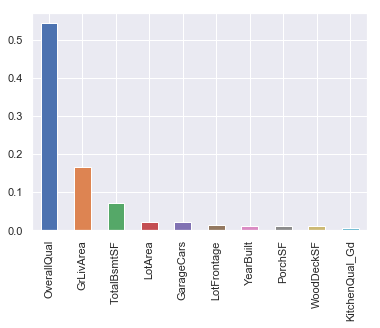

In [596]:
# plot feature importances

pd.Series(index = X_train.columns, data = rf.feature_importances_).sort_values().nlargest(10).plot(kind = 'bar')

In [618]:
rff = RandomForestRegressor()
rff.fit(X_train, np.log(y_train))
rff.score(X_train, np.log(y_train))

0.9504739665848753

In [616]:
rmsle(rff.predict(X_train), np.log(y_train))

0.0072390548916939496

### DecisionTree

In [591]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.9993141289437586

In [592]:
y_tree_pred = tree.predict(X_train)
rmsle(y_tree_pred, y_train)

0.007948709920867207

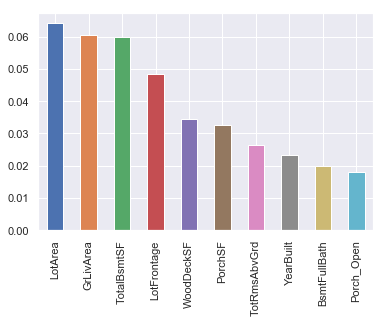

In [594]:
pd.Series(index = X_train.columns, data = tree.feature_importances_).sort_values().nlargest(10).plot(kind = 'bar')

## Cross-Validation

Use k-fold cross validation to look at test scores and train scores

In [606]:
k5.split(X=X_train, y=y_train)

<generator object _BaseKFold.split at 0x000001BE16D12A98>

In [610]:
import sklearn.model_selection as ms

# manually report rmsle for k-fold CV
def k5_split(X_train, y_train, model):
    # define KFold
    k5 = ms.KFold(n_splits = 5)
    train_rmsle = []
    test_rmsle = []
    
    # look at the rmsle for each split
    for train_index, test_index in k5.split(X=X_train, y=y_train):
        X_train_k5 = X_train.iloc[train_index]
        y_train_k5 = y_train.iloc[train_index]
        X_test_k5 = X_train.iloc[test_index]
        y_test_k5 = y_train.iloc[test_index]
    
        # fit tree model on the training set
        model.fit(X_train_k5, y_train_k5)
    
        # predict y-values for train and test set
        # calculate rmsle
        train_rmsle.append(rmsle(model.predict(X_train_k5), y_train_k5))
        test_rmsle.append(rmsle(model.predict(X_test_k5), y_test_k5))

    print('Train rmsle: {}'.format(train_rmsle))
    print('Test rmsle: {}'.format(test_rmsle))

In [611]:
k5_split(X_train, y_train, tree)

Train rmsle: [0.008888452071933717, 0.008888452071933717, 0.0, 0.00888464300723258, 0.0]
Test rmsle: [0.2600091071092383, 0.2767560469478541, 0.29330574771056395, 0.29534255779888224, 0.40778477279605235]


In [612]:
k5_split(X_train, y_train, rf)

Train rmsle: [0.09891113729152679, 0.09299321523054255, 0.10181474699377902, 0.09942578310179899, 0.07031873590600733]
Test rmsle: [0.16572359849753102, 0.18300719007498178, 0.17054298374644566, 0.17253708372587417, 0.3212416476360583]


In [613]:
k5_split(X_train, y_train, lm)

Train rmsle: [0.18895682993104343, 0.18768495282095854, 0.18556737540804122, 0.1868028344737893, 0.1254638935258233]
Test rmsle: [0.1635847559269567, 0.1419941752249192, 0.16578729428999117, 0.15581576916603734, 0.3281859379730402]


Clearly, the models don't work as well as we hoped for on the test sets

## Ridge, Lasso, ElasticNet

In [624]:
from sklearn import linear_model

# define ridge model
ridge = linear_model.Ridge(alpha = 1)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.8272720622901054

In [625]:
# define lasso model
lasso = linear_model.Lasso(alpha=1)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.8274618466040303

In [ ]:
# elastic net won't be much better, so won't try it for now

## Box-Cox